In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


In [4]:
#reading the CSV file
df = pd.read_csv("C:\\Users\\Gacheru\\Downloads\\history.csv")
df.head()

,2021,28.71
0,2020,18.40
1,2019,31.49
2,2018,-4.38
3,2017,21.83
4,2016,11.96


In [5]:
#renaming the coloumns since they had years and return as they coloumn names

df.rename(columns = {'2021':'Year', '28.71':'% Return'}, inplace = True)

In [6]:
df.tail()

,Year,% Return
90,1930,-24.90
91,1929,-8.42
92,1928,43.61
93,1927,37.49
94,1926,11.62


In [7]:
#adding a new row with the missing data
new_row = pd.DataFrame({"Year":2021,"% Return":28.71},index=[0])
df = pd.concat([new_row, df]).reset_index(drop = True)

In [8]:
df.describe()

,Year,% Return
count,96.000000,96.000000
mean,1973.500000,12.327604
std,27.856777,19.632006
min,1926.000000,-43.340000
25%,1949.750000,-0.555000
50%,1973.500000,14.685000
75%,1997.250000,26.567500
max,2021.000000,53.990000


In [9]:
#looking at the data tyes
df.tail()


,Year,% Return
91,1930,-24.90
92,1929,-8.42
93,1928,43.61
94,1927,37.49
95,1926,11.62


In [10]:
#creating a funct to categorize the years based on decades
def filter(x):
    if x <= 1929:
        return "Decade 0.5"
    if (x >= 1930 and x <=1939 ):
        return "Decade 1"
    if (x >= 1940 and x <=1949 ):
        return "Decade 2"
    if (x >= 1950 and x <=1959 ):
        return "Decade 3"
    if (x >= 1960 and x <=1969 ):
        return "Decade 4"
    if (x >= 1970 and x <=1979 ):
        return "Decade 5"
    if (x >= 1980 and x <=1989 ):
        return "Decade 6"
    if (x >= 1990 and x <=1999 ):
        return "Decade 7"
    if (x >= 2000 and x <=2009 ):
        return "Decade 8"
    if (x >= 2010 and x <=2019 ):
        return "Decade 9"
    if (x >= 2020 and x <= 2023):
        return "Decade 10"
    
#applying the function to the df"Year" column
df["decade"] = df["Year"].apply(filter)
df

,Year,% Return,decade
0,2021,28.71,Decade 10
1,2020,18.40,Decade 10
2,2019,31.49,Decade 9
3,2018,-4.38,Decade 9
4,2017,21.83,Decade 9
...,...,...,...
91,1930,-24.90,Decade 1
92,1929,-8.42,Decade 0.5
93,1928,43.61,Decade 0.5
94,1927,37.49,Decade 0.5


In [11]:
#lets take a look at the average mean of the data for the period
df_mean = df["% Return"].mean()
df_mean


12.327604166666662

In [12]:
#median calculation of the data
df_median = df["% Return"].median()
df_median

14.685

In [13]:
#min and max of the returns
max_return = df['% Return'].max()
max_return


53.99

In [14]:
min_return = df["% Return"].min()
min_return

-43.34

In [15]:
#standard deviation and the variance of the data set
df_std_dev = df["% Return"].std()


#the data has a very high stand deviation from the mean

In [16]:
#calculating the variance of the returns
import statistics
df_var = statistics.variance(df["% Return"])
df_var


385.4156689364035

In [17]:
#skewness 
import scipy
return_skewness = scipy.stats.skew(df["% Return"],axis=0,bias=True)
return_skewness
#the skewness is negative, mean is on the left, mode highest pint on the right and median middle


-0.4187607320811005

In [18]:
#kurtosis measure of describing shape of a prob distr of its tailedness
#it evaluates the thich or thin of the tails compared to normal distr
#skweness is diff the tail of the distr ased on xtreme values
#kurtosis measures wextreme values in either tails
return_kurtosis = scipy.stats.kurtosis(df["% Return"],fisher=False)
return_kurtosis

3.0465301755564416

<AxesSubplot:xlabel='decade', ylabel='% Return'>

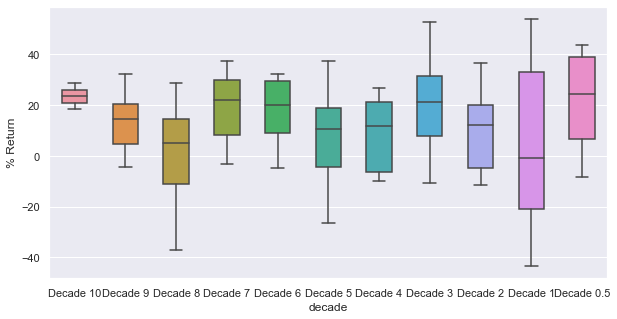

In [40]:
#start visualization of the numerical data based on decade
#boxplot - of the distr of returns per generation
fig,ax = plt.subplots(figsize=(10
                               ,5))
sns.boxplot(data=df,y="% Return",x="decade",width= 0.5)


In [20]:
#categirize returns as High, Low and Medium
def cat_return(x):
    if x <= 0:
        return "Extremely Low"
    if (x > 1 and x <= 5):
        return "Low"
    if (x > 6 and x <= 10 ):
        return " Medium"
    if (x > 11 and x <= 20):
        return "High"
    if (x > 21 and x <= 100):
        return " Extremely High"
#applying the function to the df"return" column
df["Return_Classification"] = df["% Return"].apply(cat_return)
df

,Year,% Return,decade,Return_Classification
0,2021,28.71,Decade 10,Extremely High
1,2020,18.40,Decade 10,High
2,2019,31.49,Decade 9,Extremely High
3,2018,-4.38,Decade 9,Extremely Low
4,2017,21.83,Decade 9,Extremely High
...,...,...,...,...
91,1930,-24.90,Decade 1,Extremely Low
92,1929,-8.42,Decade 0.5,Extremely Low
93,1928,43.61,Decade 0.5,Extremely High
94,1927,37.49,Decade 0.5,Extremely High


<AxesSubplot:xlabel='Return_Classification', ylabel='count'>

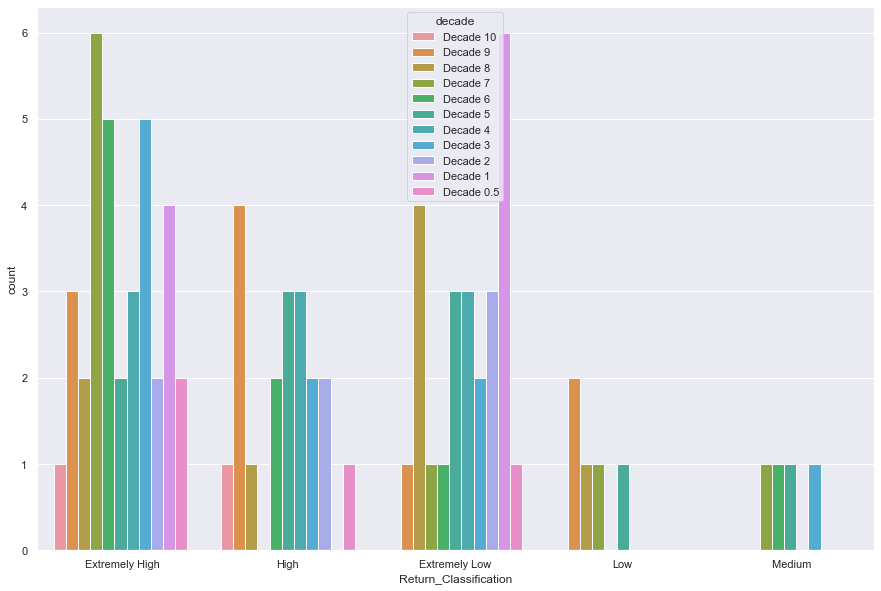

In [32]:
#creating a countplot to vizualize the Return classification data with the decade data
sns.set(rc={"figure.figsize":(15,10)})
sns.countplot(hue="decade",x="Return_Classification",data=df)

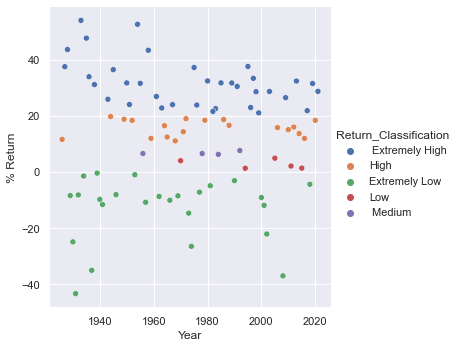

In [48]:
# Barplot 
sns.set(rc={"figure.figsize":(15,10)})
sns.relplot(data=df, x="Year", y="% Return", hue="Return_Classification")

#there is no correlaion in this data

In [25]:
#analysis of decade 1
decade_six = df.loc[df['decade'] == "Decade 0.5"]
decade_six

,Year,% Return,decade,Return_Classification
92,1929,-8.42,Decade 0.5,Extremely Low
93,1928,43.61,Decade 0.5,Extremely High
94,1927,37.49,Decade 0.5,Extremely High
95,1926,11.62,Decade 0.5,High


<AxesSubplot:xlabel='% Return', ylabel='Density'>

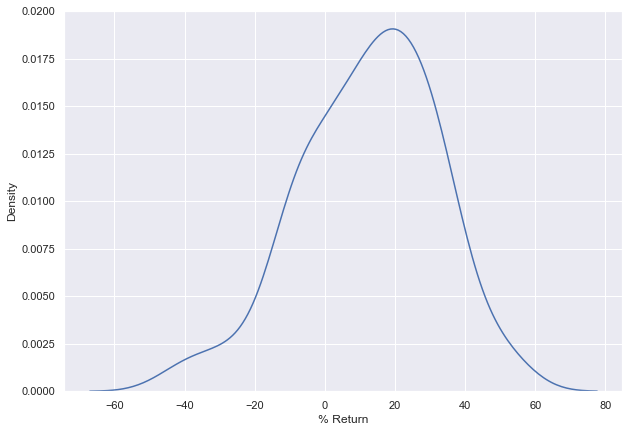

In [31]:
#kde 
sns.set(rc={"figure.figsize":(10,7)})
sns.kdeplot(data=df, x="% Return")

In [58]:
#Corelation for the data set, no correlation observed in the data
df_corr = df['% Return'].corr
df_corr

<bound method Series.corr of 0     28.71
1     18.40
2     31.49
3     -4.38
4     21.83
      ...  
91   -24.90
92    -8.42
93    43.61
94    37.49
95    11.62
Name: % Return, Length: 96, dtype: float64>

In [52]:
df.head()

,Year,% Return,decade,Return_Classification
0,2021,28.71,Decade 10,Extremely High
1,2020,18.40,Decade 10,High
2,2019,31.49,Decade 9,Extremely High
3,2018,-4.38,Decade 9,Extremely Low
4,2017,21.83,Decade 9,Extremely High
